In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

# Лабораторная работа №1. Питон для математиков. Вариант 4

# Создание матрицы. Вычисление определителя.

1. Создать матрицу 7x7 случайных целых чисел принадлежащих отрезку [0, 10]. Вычислить ее определитель.

In [25]:
matrix = np.random.randint(0, 10, (7, 7))
matrix

array([[0, 6, 2, 8, 2, 2, 2],
       [6, 9, 1, 5, 7, 5, 7],
       [4, 9, 4, 2, 5, 3, 3],
       [0, 4, 7, 7, 7, 4, 6],
       [1, 6, 2, 6, 1, 5, 6],
       [4, 6, 0, 8, 5, 1, 7],
       [7, 3, 6, 8, 0, 5, 6]], dtype=int32)

In [26]:
transposed_matrix = matrix.T
transposed_matrix

array([[0, 6, 4, 0, 1, 4, 7],
       [6, 9, 9, 4, 6, 6, 3],
       [2, 1, 4, 7, 2, 0, 6],
       [8, 5, 2, 7, 6, 8, 8],
       [2, 7, 5, 7, 1, 5, 0],
       [2, 5, 3, 4, 5, 1, 5],
       [2, 7, 3, 6, 6, 7, 6]], dtype=int32)

In [27]:
determinant = np.linalg.det(transposed_matrix)
determinant

np.float64(399131.99999999977)

# Умножение матриц

In [28]:
matrix_1 = np.random.randint(0, 10, (7, 7))
matrix_2 = np.random.randint(0, 10, (7, 7))
result = np.dot(matrix_2, matrix_1)
print('B=', matrix_1)
print('C=', matrix_2)
print('B*C=', result)


B= [[0 5 6 1 3 8 4]
 [7 0 0 4 3 5 2]
 [6 5 4 1 0 5 7]
 [7 5 2 4 6 7 0]
 [3 2 9 6 9 2 7]
 [0 2 4 0 2 0 6]
 [4 6 4 2 0 0 8]]
C= [[6 9 4 0 9 4 6]
 [9 2 3 8 3 0 1]
 [0 7 3 0 7 4 3]
 [1 8 2 5 0 7 9]
 [2 1 1 9 4 4 1]
 [8 1 8 1 6 6 9]
 [0 8 7 1 9 6 6]]
B*C= [[138 112 173 112 134 131 205]
 [101 112 113  72 108 159  90]
 [100  55 103  79  92  64 132]
 [139 108  88  73  71  93 148]
 [ 92  82  90  69 107  97  77]
 [116 163 196  78  99 128 240]
 [156 106 159 109 123 100 212]]


# Решение системы линейных уравнений.

In [29]:

M2 = np.array([[3, 2, 1], [3, 3, 2], [5, 5, 3]], int) # Матрица (левая часть системы)
v2 = np.array([5, 7, 11], int) # Вектор (правая часть системы)

np.linalg.solve(M2, v2)

array([1.00000000e+00, 2.93098879e-15, 2.00000000e+00])

# Вычисление интеграла с помощью SciPy

Вычислите интеграл $$\int_0^{\frac{\pi}{4}} \frac{dx}{1 + 2 \sin^2 x}$$

In [34]:

result, error = integrate.quad(lambda x: 1/(1+2*math.sin(x)*math.sin(x)), 0, math.pi/4)
result


0.6045997880780726

Вычислите интеграл $$\int_{-1}^{2} dy \int_{y^2}^{y+2} y^2 dx$$

In [38]:
def inner_integral(y):
    return integrate.quad(lambda x: y*y, y*y, y+2)[0]
result, error = integrate.quad(inner_integral, -1, 2)
result

3.1500000000000004

# Построение графиков функций с помощью Mathplotlib

Построить в одной системе координат графики функций: $$y = 1 - cos(x), y = \sqrt(3-x)$$
Оси координат должны быть подписаны, графики должны быть разного цвета, должна быть выведена легенда.

C:\Users\Darowiin\AppData\Local\Temp\ipykernel_8788\3028957635.py:27: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(3 - x)


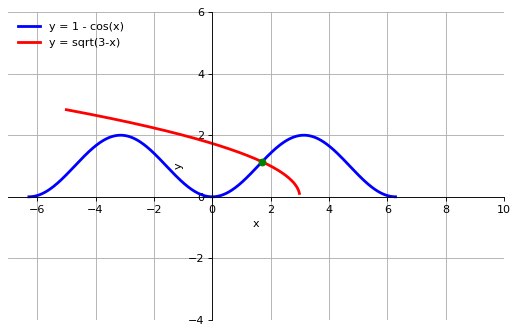

In [40]:
# Найдем тачки пересечения

def find_intersections(f1, f2, x_values, tolerance=1e-5):
    intersections = []
    for i in range(len(x_values) - 1):
        x_left, x_right = x_values[i], x_values[i + 1]
        y_left, y_right = f1(x_left) - f2(x_left), f1(x_right) - f2(x_right)
        
        if y_left * y_right <= 0:  # Значит есть пересечение
            while abs(x_right - x_left) > tolerance:
                x_mid = (x_left + x_right) / 2
                y_mid = f1(x_mid) - f2(x_mid)
                if y_left * y_mid <= 0:
                    x_right = x_mid
                    y_right = y_mid
                else:
                    x_left = x_mid
                    y_left = y_mid
            intersections.append((x_left + x_right) / 2)
    return intersections

# Определение функций
def f1(x):
    return 1 - np.cos(x)

def f2(x):
    return np.sqrt(3 - x)

# Диапазон значений x
x_values = np.linspace(-5, 5, 1000)

# Нахождение всех точек пересечения
intersections_x = find_intersections(f1, f2, x_values)
intersections_y = [f1(x) for x in intersections_x]

# Построение графика
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# Удаление правой и верхней границ
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Установить направление данных на координатной оси
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# Подготовить данные для функций
x1 = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y1 = f1(x1)

x2 = np.linspace(-5, 10, 1000)
y2 = f2(x2)

# Построение графиков
plt.plot(x1, y1, color="blue", linewidth=2.5, label="y = 1 - cos(x)")
plt.plot(x2, y2, color="red", linewidth=2.5, label="y = sqrt(3-x)")

# Ограничение осей
plt.xlim(-7, 10)
plt.ylim(-4, 6)

# Подписи осей
plt.xlabel("x")
plt.ylabel("y")

# Добавление легенды
plt.legend(loc='upper left', frameon=False)

# Отображение всех точек пересечения
ax.scatter(intersections_x, intersections_y, c='g', zorder=5, label='Intersection')

# Добавление сетки
plt.grid(True)

# Отображение графика
plt.show()